<a href="https://www.kaggle.com/code/lalit7881/bmw-global-sales-analysis-99-87-100-accuracy?scriptVersionId=296940072" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bmw-dataset/BMW sales data (2010-2024).csv


## Title

BMW Global Sales Performance (2010–2024)

## Description

This dataset provides a comprehensive overview of BMW’s global sales performance from 2010 to 2024. It captures year-wise trends in vehicle sales across major international markets, reflecting the company’s growth, market expansion, and response to changing consumer preferences over time.

The data highlights key phases such as post-recession recovery, steady growth in emerging markets, the impact of global disruptions like the COVID-19 pandemic, and the recent shift toward electric and hybrid vehicles. By analyzing this dataset, one can identify long-term sales patterns, peak and decline periods, regional performance differences, and the effectiveness of BMW’s strategic initiatives.

Overall, this dataset is valuable for market analysis, trend forecasting, performance comparison, and understanding the evolution of BMW’s position in the global automotive industry over a 15-year period.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/bmw-dataset/BMW sales data (2010-2024).csv")

In [3]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
df.tail()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High
49999,X1,2020,North America,Blue,Diesel,Manual,3.3,171003,77492,1764,Low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [6]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [7]:
df.nunique()

Model                      11
Year                       15
Region                      6
Color                       6
Fuel_Type                   4
Transmission                2
Engine_Size_L              36
Mileage_KM              44347
Price_USD               38246
Sales_Volume             9845
Sales_Classification        2
dtype: int64

In [8]:
df.dtypes

Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

In [9]:
df.shape

(50000, 11)

In [10]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

## Data visualizations

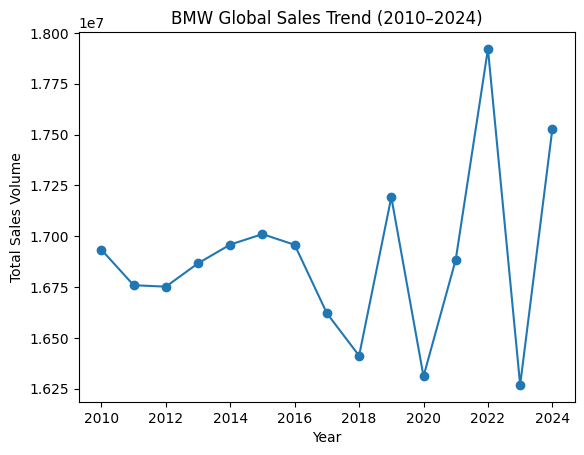

In [13]:
sales_by_year = df.groupby("Year")["Sales_Volume"].sum()

plt.plot(sales_by_year.index, sales_by_year.values, marker='o')
plt.title("BMW Global Sales Trend (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.show()


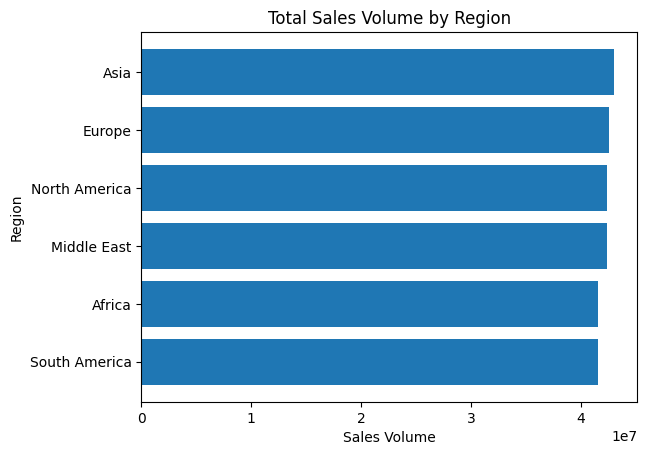

In [14]:
sales_by_region = df.groupby("Region")["Sales_Volume"].sum().sort_values()

plt.barh(sales_by_region.index, sales_by_region.values)
plt.title("Total Sales Volume by Region")
plt.xlabel("Sales Volume")
plt.ylabel("Region")
plt.show()


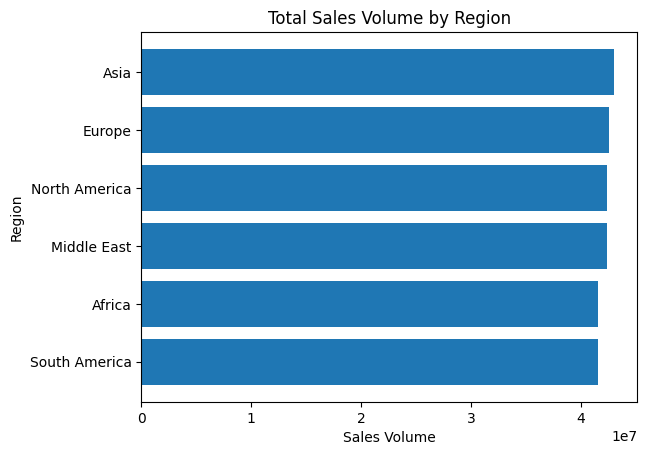

In [15]:
sales_by_region = df.groupby("Region")["Sales_Volume"].sum().sort_values()

plt.barh(sales_by_region.index, sales_by_region.values)
plt.title("Total Sales Volume by Region")
plt.xlabel("Sales Volume")
plt.ylabel("Region")
plt.show()


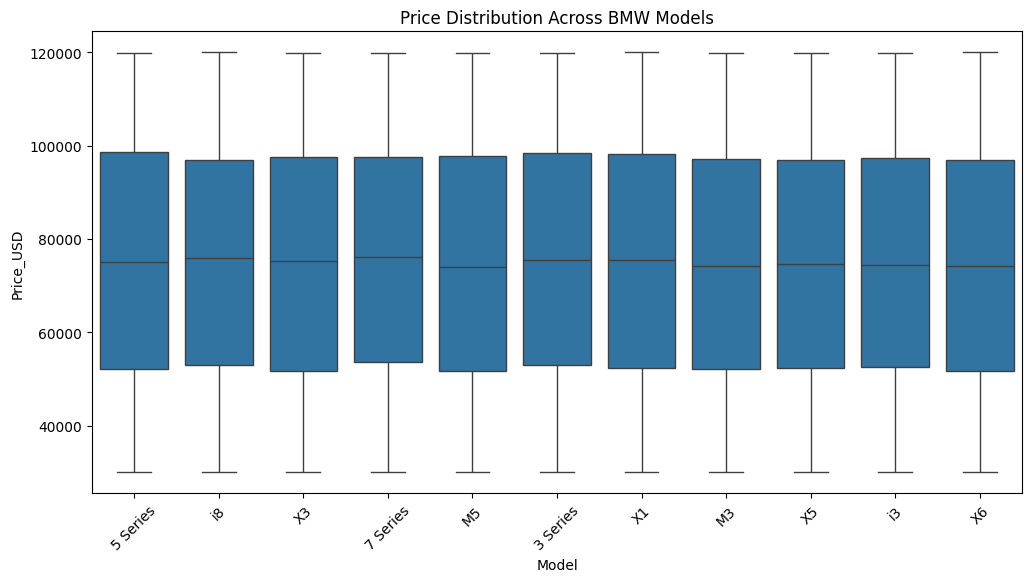

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="Price_USD", data=df)
plt.title("Price Distribution Across BMW Models")
plt.xticks(rotation=45)
plt.show()


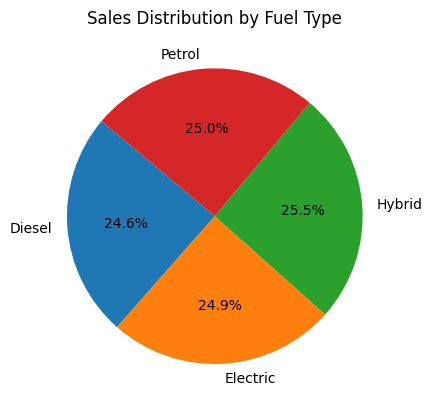

In [17]:
fuel_sales = df.groupby("Fuel_Type")["Sales_Volume"].sum()

plt.pie(fuel_sales, labels=fuel_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Fuel Type")
plt.show()


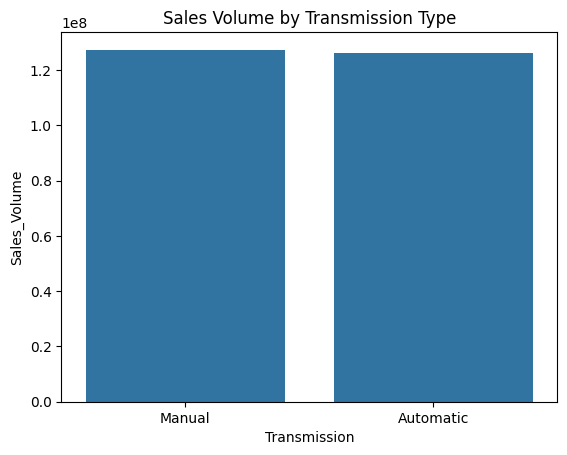

In [18]:
sns.barplot(
    x="Transmission",
    y="Sales_Volume",
    data=df,
    estimator=sum,
    ci=None
)
plt.title("Sales Volume by Transmission Type")
plt.show()



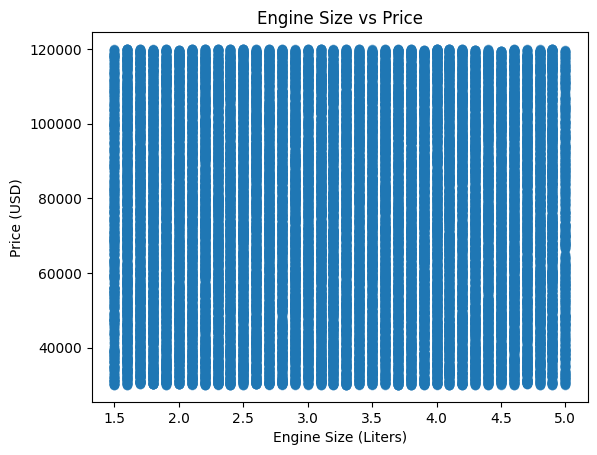

In [19]:
plt.scatter(df["Engine_Size_L"], df["Price_USD"], alpha=0.6)
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size (Liters)")
plt.ylabel("Price (USD)")
plt.show()


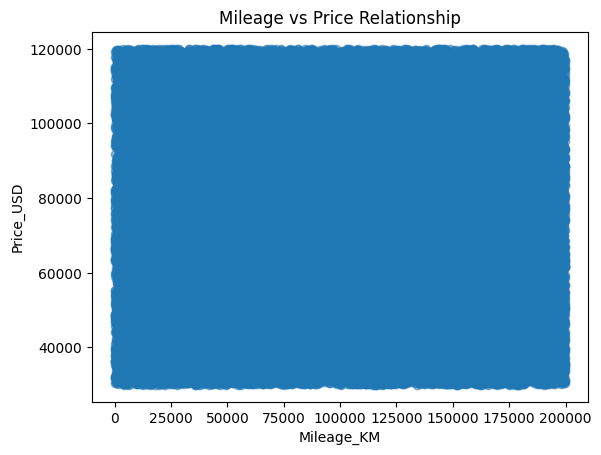

In [20]:
sns.regplot(
    x="Mileage_KM",
    y="Price_USD",
    data=df,
    scatter_kws={'alpha':0.5}
)
plt.title("Mileage vs Price Relationship")
plt.show()


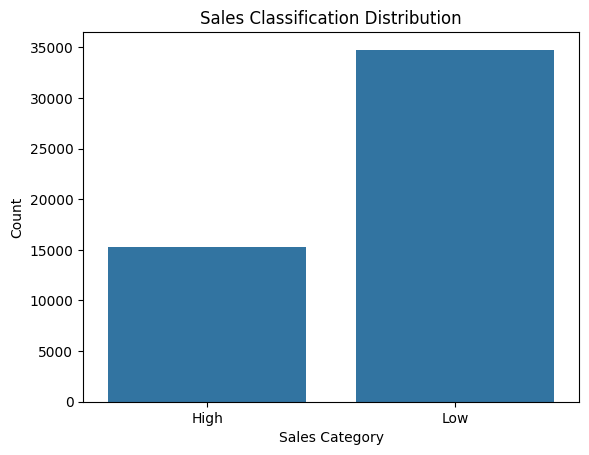

In [21]:
sns.countplot(x="Sales_Classification", data=df)
plt.title("Sales Classification Distribution")
plt.xlabel("Sales Category")
plt.ylabel("Count")
plt.show()


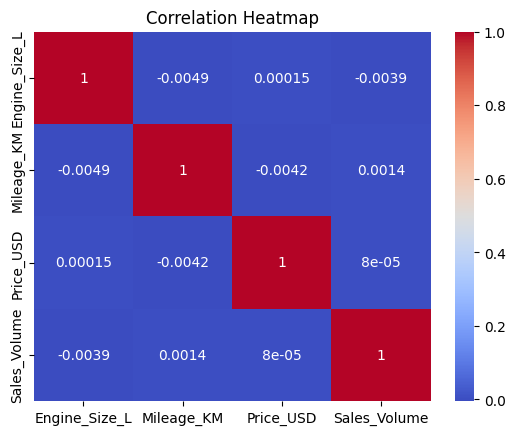

In [22]:
numeric_cols = [
    "Engine_Size_L", "Mileage_KM", "Price_USD", "Sales_Volume"
]

corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Feature engg

In [23]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [25]:
df.isnull().sum()


Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

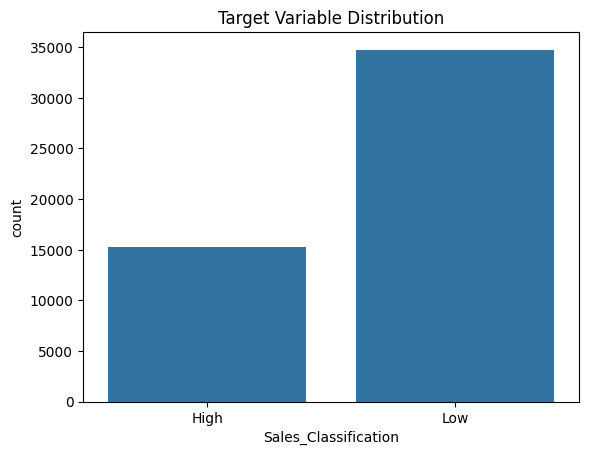

In [26]:
sns.countplot(x="Sales_Classification", data=df)
plt.title("Target Variable Distribution")
plt.show()


In [27]:
X = df.drop("Sales_Classification", axis=1)
y = df["Sales_Classification"]


In [28]:
categorical_cols = [
    "Model", "Region", "Color", "Fuel_Type", "Transmission"
]

numerical_cols = [
    "Year", "Engine_Size_L", "Mileage_KM", "Price_USD", "Sales_Volume"
]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


In [29]:
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)


In [32]:
results_df = pd.DataFrame({
    "Model": results.keys(),
    "Accuracy (%)": [v * 100 for v in results.values()]
})

results_df


,Model,Accuracy (%)
0,Logistic Regression,99.87
1,Decision Tree,100.00
2,Random Forest,100.00
3,SVM,99.47


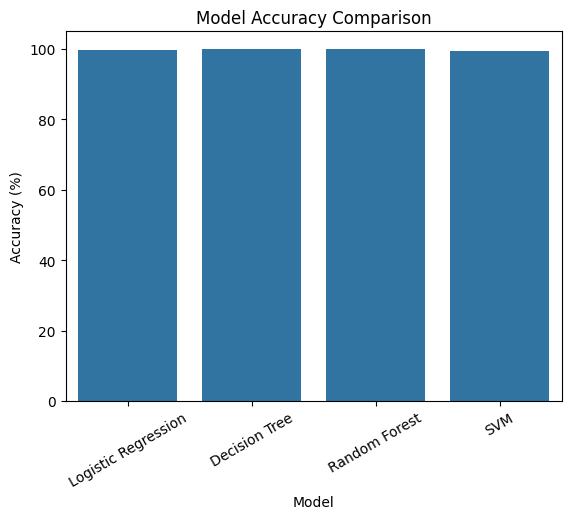

In [33]:
sns.barplot(x="Model", y="Accuracy (%)", data=results_df)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()


In [34]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)

print("Best Model:", best_model_name)
print(classification_report(y_test, y_pred_best))


Best Model: Decision Tree
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      3049
         Low       1.00      1.00      1.00      6951

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



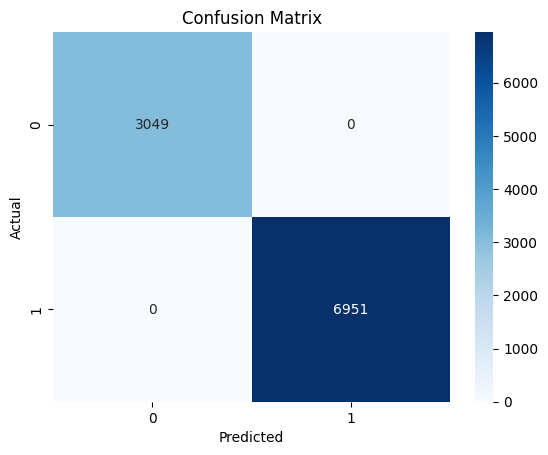

In [35]:
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
rf = models["Random Forest"]

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)


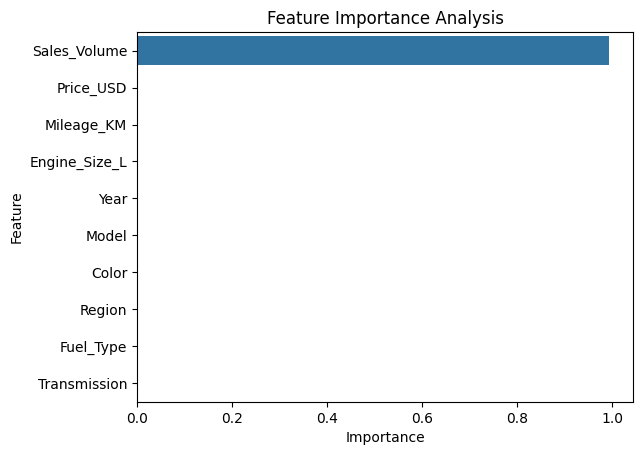

In [37]:
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance
)
plt.title("Feature Importance Analysis")
plt.show()


In [38]:
sample = X_test.iloc[:10]
actual = y_test.iloc[:10]
predicted = best_model.predict(sample)

comparison = pd.DataFrame({
    "Actual": actual.values,
    "Predicted": predicted
})

comparison


,Actual,Predicted
0,High,High
1,Low,Low
2,Low,Low
3,High,High
4,Low,Low
5,Low,Low
6,Low,Low
7,High,High
8,Low,Low
9,Low,Low


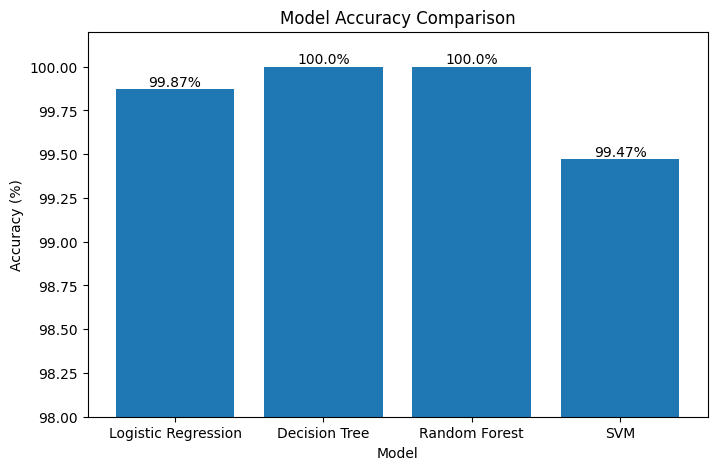

In [39]:
data = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "SVM"
    ],
    "Accuracy (%)": [
        99.87,
        100.00,
        100.00,
        99.47
    ]
}

df = pd.DataFrame(data)

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(df["Model"], df["Accuracy (%)"])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.ylim(98, 100.2)

# Add value labels
for i, val in enumerate(df["Accuracy (%)"]):
    plt.text(i, val + 0.02, f"{val}%", ha='center')

plt.show()

## Thank you...pls upvote!!!!!